<a href="https://colab.research.google.com/github/nivedanyakolli361/CNN1/blob/main/Models/My_Model_Normal_CNN_Gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Convolution Neural Network

# Part 1 - Building CNN Architecture and Importing Data
import tensorflow as tf
# Importing the Keras libraries and packages
# 'Sequential' library used to Initialize NN as sequence of layers (Alternative to Graph initialization)
from keras.models import Sequential

# 'Conv2D' for 1st step of adding convolution layers to images ('Conv3D' for videos with time as 3rd dimension)
from keras.layers import Conv2D

# 'MaxPooling2D' step 2 for pooling of max values from Convolution Layers
from keras.layers import MaxPooling2D

# 'Flatten' Pooled Layers for step 3
from keras.layers import Flatten

# 'Dense' for fully connected layers that feed into classic ANN
from keras.layers import Dense

In [3]:
import tensorflow as tf 
device__list = tf.test.gpu_device_name()
device__list

'/device:GPU:0'

In [4]:
# Initializing the CNN and Calling this object a 'classifier' because that's its job
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[190, 190, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=120, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [5]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Training',
                                                 target_size = (190, 190),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Test',
                                            target_size = (190, 190),
                                            batch_size = 32,
                                            class_mode = 'binary')
val_set = test_datagen.flow_from_directory('/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Validation',
                                            target_size = (190, 190),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2003 images belonging to 2 classes.
Found 428 images belonging to 2 classes.
Found 430 images belonging to 2 classes.


In [9]:
r = cnn.fit(training_set, validation_data = val_set, epochs = 32)

Epoch 1/32
63/63 [==============================] - 28s 438ms/step - loss: 0.4042 - accuracy: 0.8153 - val_loss: 0.6251 - val_accuracy: 0.6535
Epoch 2/32
63/63 [==============================] - 27s 430ms/step - loss: 0.4032 - accuracy: 0.8203 - val_loss: 0.5005 - val_accuracy: 0.7256
Epoch 3/32
63/63 [==============================] - 27s 428ms/step - loss: 0.4290 - accuracy: 0.7993 - val_loss: 0.5170 - val_accuracy: 0.7372
Epoch 4/32
63/63 [==============================] - 27s 429ms/step - loss: 0.3829 - accuracy: 0.8208 - val_loss: 0.4886 - val_accuracy: 0.7302
Epoch 5/32
63/63 [==============================] - 29s 456ms/step - loss: 0.3804 - accuracy: 0.8273 - val_loss: 0.5593 - val_accuracy: 0.6953
Epoch 6/32
63/63 [==============================] - 27s 436ms/step - loss: 0.3788 - accuracy: 0.8328 - val_loss: 0.5876 - val_accuracy: 0.6488
Epoch 7/32
63/63 [==============================] - 27s 431ms/step - loss: 0.3613 - accuracy: 0.8342 - val_loss: 0.6710 - val_accuracy: 0.6791

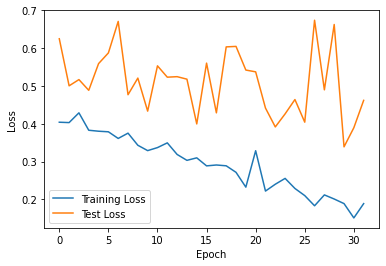

In [10]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

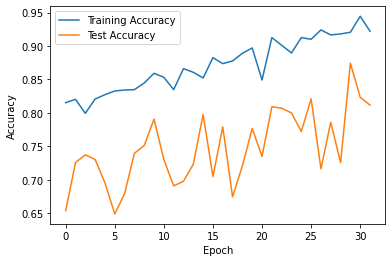

In [11]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [12]:
path = '/content/drive/MyDrive/my_model_Normal_CNN.h5'

cnn.save(path)

In [14]:
from keras.models import load_model
cd = load_model('/content/drive/MyDrive/my_model_Normal_CNN.h5')

In [15]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Training/Non-OKC/Non-OKC_0.jpg', target_size = (190, 190))

# Add a 3rd Color dimension to match Model expectation
test_image = image.img_to_array(test_image)

# Add one more dimension to beginning of image array so 'Predict' function can receive it (corresponds to Batch, even if only 
# one batch)
test_image = np.expand_dims(test_image, axis = 0)
result = cd.predict(test_image)
print(result)

[[0.]]


In [16]:
training_set.class_indices

# Map is 2D so check the first row, first column value
if result[0][0] > 0.5:
    prediction = 'Normal'
else:
    prediction = 'OKC'
# Print result

print("The model class indices are:", training_set.class_indices)

print("\nPrediction: " + prediction)

The model class indices are: {'Non-OKC': 0, 'OKC': 1}

Prediction: OKC


In [17]:
y_pred = cd.predict(val_set)
y_pred

array([[6.10554949e-08],
       [2.79858649e-01],
       [9.94680107e-01],
       [9.22371507e-01],
       [1.65860593e-01],
       [5.51272810e-01],
       [9.54438746e-01],
       [1.09682381e-02],
       [9.90483522e-01],
       [9.41265702e-01],
       [9.59941149e-01],
       [9.88537550e-01],
       [5.49389303e-01],
       [4.21529233e-01],
       [5.21953443e-05],
       [5.98838553e-03],
       [2.71570683e-01],
       [6.86954796e-01],
       [4.96080786e-01],
       [9.51826930e-01],
       [1.18522175e-01],
       [9.83854473e-01],
       [1.96804911e-01],
       [3.18116874e-01],
       [7.17302859e-02],
       [8.01246524e-01],
       [9.19832766e-01],
       [5.08459985e-01],
       [9.69937265e-01],
       [8.09786376e-04],
       [1.96045771e-01],
       [2.66263932e-01],
       [1.00155077e-04],
       [9.57599819e-01],
       [5.99153519e-01],
       [1.55515139e-04],
       [8.10100403e-07],
       [6.07032955e-01],
       [8.48869979e-01],
       [7.89831102e-01],


In [18]:
pred = []
for i in y_pred:
  if i[0] < 0.5:
    pred.append(0)

  else:
    pred.append(1)

In [19]:
pred

[0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,


In [74]:
y_true1 = [0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1]

In [21]:
y_true = val_set.classes

In [22]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [23]:
len(pred)

430

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [75]:
cm = confusion_matrix(y_true1,pred)
cm

array([[214,  17],
       [ 15, 184]])

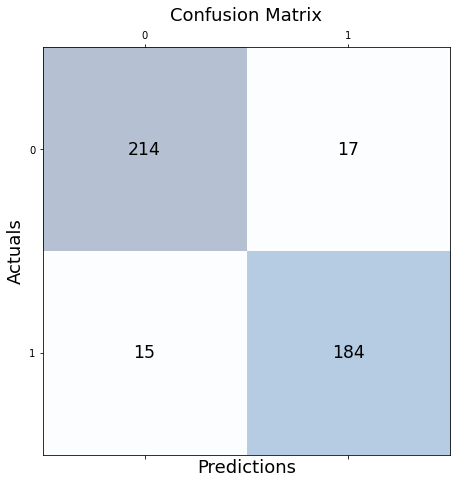

In [76]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

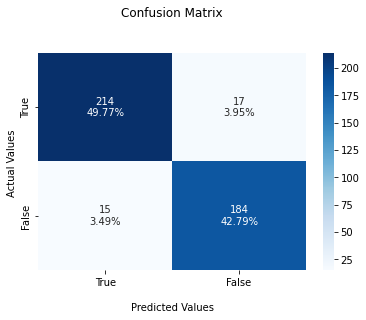

In [77]:
import seaborn as sns

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [78]:
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Precision: %.3f' % precision_score(y_true1,pred))

print('Recall: %.3f' % recall_score(y_true1,pred))

print('Accuracy: %.3f' % accuracy_score(y_true1,pred))

print('F1 Score: %.3f' % f1_score(y_true1,pred))

Precision: 0.915
Recall: 0.925
Accuracy: 0.926
F1 Score: 0.920


In [79]:
target_names = ['OKC', 'Non-OKC']
print(classification_report(y_true1,pred, target_names=target_names))

              precision    recall  f1-score   support

         OKC       0.93      0.93      0.93       231
     Non-OKC       0.92      0.92      0.92       199

    accuracy                           0.93       430
   macro avg       0.92      0.93      0.93       430
weighted avg       0.93      0.93      0.93       430



In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_true1, pred)

In [80]:
print('roc_auc_score :', roc_auc_score(y_true1, pred))

roc_auc_score : 0.9255150209924079


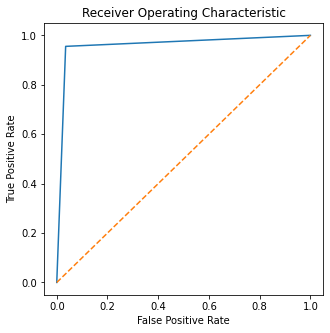

roc_auc_score : 0.9255150209924079


In [81]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('roc_auc_score :', roc_auc_score(y_true1, pred))

In [82]:
predictions = cnn.predict(x=test_set, steps=len(test_set), verbose=0)

In [83]:
predictions

array([[6.76692367e-01],
       [9.67559159e-01],
       [5.68782128e-02],
       [7.93242633e-01],
       [9.44783824e-05],
       [1.49189070e-01],
       [9.24607694e-01],
       [2.49850418e-04],
       [1.61659217e-03],
       [1.51583983e-03],
       [9.18399632e-01],
       [2.18556240e-01],
       [7.41510093e-01],
       [9.85919237e-01],
       [9.42137301e-01],
       [1.78939972e-05],
       [1.70885921e-02],
       [1.25404795e-05],
       [9.63864565e-01],
       [1.09087734e-04],
       [4.83929925e-03],
       [9.31719303e-01],
       [9.84015942e-01],
       [5.35441220e-01],
       [9.49612260e-01],
       [2.09595367e-01],
       [9.72122252e-01],
       [4.27120613e-05],
       [2.52816081e-02],
       [8.03482294e-01],
       [9.89257872e-01],
       [1.81481926e-04],
       [9.55438673e-01],
       [9.31392074e-01],
       [9.52138186e-01],
       [4.66500074e-02],
       [5.82217872e-01],
       [7.75715053e-01],
       [8.69967818e-01],
       [8.65183115e-01],


In [84]:
# Evaluate the best model with testing data.
print(cnn.evaluate(x=test_set))

14/14 [==============================] - 2s 169ms/step - loss: 0.3107 - accuracy: 0.8902
[0.31065547466278076, 0.8901869058609009]


In [85]:
np.round(predictions)

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

In [86]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 12.4 MB/s 
     |████████████████████████████████| 84 kB 2.0 MB/s 
     |████████████████████████████████| 212 kB 67.6 MB/s 
     |████████████████████████████████| 1.1 MB 59.8 MB/s 
     |████████████████████████████████| 272 kB 73.0 MB/s 
     |████████████████████████████████| 2.3 MB 60.8 MB/s 
     |████████████████████████████████| 140 kB 40.0 MB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
     |████████████████████████████████| 57 kB 5.4 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 271 kB 71.1 MB/s 
     |████████████████████████████████| 94 kB 3.5 MB/s 
     |████████████████████████████████| 144 kB 74.3 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 80 kB 10.9 MB/s 
     |████████████████████████████████| 68 k

In [91]:
def predict_image(img):
  img_4d=img.reshape(-1,190,190,3)
  result=cd.predict(img_4d)
  print(result)
  if result[0][0] > 0.5:
    a ='OKC'
    return a
  else:
    a = 'Non-OKC'
    return a

In [88]:
import numpy as np
from keras.preprocessing import image
import gradio as gr
import requests

In [92]:
image = gr.inputs.Image(shape=(190,190))
#label = gr.outputs.Label(num_top_classes=2)

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [93]:
gr.Interface(fn=predict_image, inputs=image, outputs='text',capture_session='True', interpretation = 'default').launch(share='True')

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://22263.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f4bc028ded0>,
 'http://127.0.0.1:7861/',
 'https://22263.gradio.app')